# MNIST dataset evaluation

## Number of epochs
I will try to find on how many epochs should I train the network.

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from som import KohonenNetwork, GaussianNeighboringFunc
import pickle

from sklearn.metrics import confusion_matrix, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns

In [2]:
# load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

Text(0.5, 1.0, 'Label: 5')

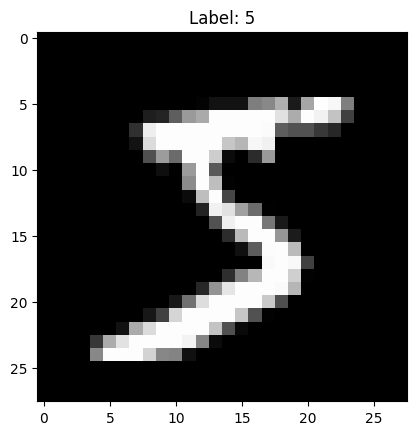

In [3]:
mnist_data = mnist.data
y = mnist.target.astype(int)


img = mnist_data.iloc[0]
plt.imshow(img.values.reshape(28, 28), cmap='gray')
plt.title(f'Label: {y[0]}')

In [4]:
mnist_data.values.shape

(70000, 784)

In [5]:
koh = KohonenNetwork(2, 5, vec_dim=28*28, neighboring_func=GaussianNeighboringFunc())
x = mnist_data.values[0]

koh.fit(mnist_data.values, epochs=5)

[array([2, 2, 5, ..., 3, 5, 2], dtype=int64),
 array([3, 4, 2, ..., 4, 2, 4], dtype=int64),
 array([4, 2, 4, ..., 6, 5, 5], dtype=int64),
 array([2, 4, 4, ..., 1, 5, 4], dtype=int64),
 array([3, 6, 2, ..., 2, 3, 4], dtype=int64)]

<Axes: >

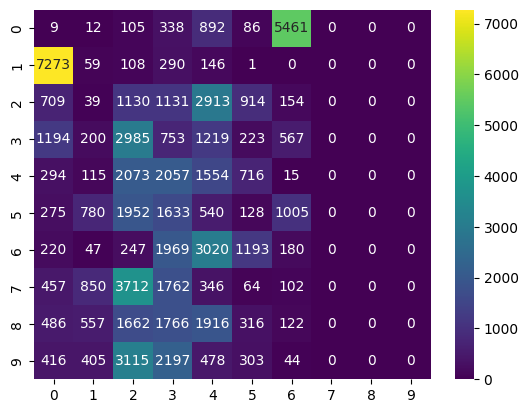

In [6]:
labels = koh.predict(mnist_data.values)
homogeneity_score(y, labels)

confusion_matrix(y, labels)
sns.heatmap(confusion_matrix(y, labels), cmap='viridis', annot=True, fmt='d')

In [7]:
print("Homogenity: ", homogeneity_score(y, labels))
print("Completeness: ", completeness_score(y, labels))
print("V-measure: ", v_measure_score(y, labels))
print("Adjusted Rand: ", adjusted_rand_score(y, labels))
print("Adjusted Mutual: ", adjusted_mutual_info_score(y, labels))

Homogenity:  0.2174750004750167
Completeness:  0.2759014331817504
V-measure:  0.24322874064958283
Adjusted Rand:  0.1688177826044459
Adjusted Mutual:  0.24308679981720005


In [22]:
labels = koh.predict(mnist_data.values, return_labels=False)


In [8]:
mapping = koh.get_mapping(mnist_data.values)

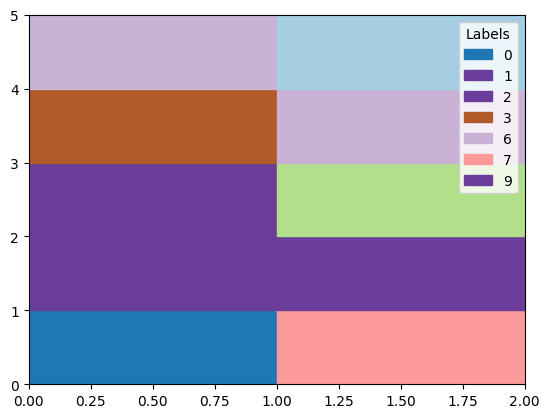

In [10]:
koh.plot_heatmap(mnist_data.values, y)


using 6 clusters I will train the network with default parameters to determine the network performance on different epochs. I will use the *Davies-Bouldin*, *homogenity* and *completness* and visuall assesement to do so.

In [16]:
koh = KohonenNetwork(10, 10, vec_dim=28*28, neighboring_func=GaussianNeighboringFunc())

koh.fit(mnist_data.values, epochs=10, verbose=True)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


[array([23, 21, 64, ..., 52, 36, 17], dtype=int64),
 array([47,  1, 65, ..., 72, 30, 19], dtype=int64),
 array([17, 70, 22, ..., 94, 75, 54], dtype=int64),
 array([27, 80, 64, ..., 76, 55, 60], dtype=int64),
 array([27, 80, 94, ..., 78, 55, 40], dtype=int64),
 array([25, 80, 94, ..., 67, 56, 61], dtype=int64),
 array([26, 80, 94, ..., 67, 46, 62], dtype=int64),
 array([27, 80, 84, ..., 67, 46, 61], dtype=int64),
 array([26, 80, 94, ..., 67, 46, 61], dtype=int64),
 array([26, 80, 94, ..., 66, 46, 62], dtype=int64)]

In [18]:
import pickle

with open('kohonen_mnist.pkl', 'wb') as f:
    pickle.dump(koh, f)

[0. 0.]
[0. 1.]
[0. 2.]
[0. 3.]
[0. 4.]
[0. 5.]
[0. 6.]
[0. 7.]
[0. 8.]
[0. 9.]
[1. 0.]
[1. 1.]
[1. 2.]
[1. 3.]
[1. 4.]
[1. 5.]
[1. 6.]
[1. 7.]
[1. 8.]
[1. 9.]
[2. 0.]
[2. 1.]
[2. 2.]
[2. 3.]
[2. 4.]
[2. 5.]
[2. 6.]
[2. 7.]
[2. 8.]
[2. 9.]
[3. 0.]
[3. 1.]
[3. 2.]
[3. 3.]
[3. 4.]
[3. 5.]
[3. 6.]
[3. 7.]
[3. 8.]
[3. 9.]
[4. 0.]
[4. 1.]
[4. 2.]
[4. 3.]
[4. 4.]
[4. 5.]
[4. 6.]
[4. 7.]
[4. 8.]
[4. 9.]
[5. 0.]
[5. 1.]
[5. 2.]
[5. 3.]
[5. 4.]
[5. 5.]
[5. 6.]
[5. 7.]
[5. 8.]
[5. 9.]
[6. 0.]
[6. 1.]
[6. 2.]
[6. 3.]
[6. 4.]
[6. 5.]
[6. 6.]
[6. 7.]
[6. 8.]
[6. 9.]
[7. 0.]
[7. 1.]
[7. 2.]
[7. 3.]
[7. 4.]
[7. 5.]
[7. 6.]
[7. 7.]
[7. 8.]
[7. 9.]
[8. 0.]
[8. 1.]
[8. 2.]
[8. 3.]
[8. 4.]
[8. 5.]
[8. 6.]
[8. 7.]
[8. 8.]
[8. 9.]
[9. 0.]
[9. 1.]
[9. 2.]
[9. 3.]
[9. 4.]
[9. 5.]
[9. 6.]
[9. 7.]
[9. 8.]
[9. 9.]


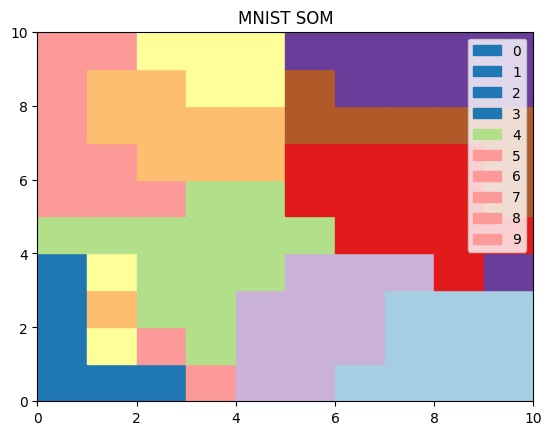

<Figure size 640x480 with 0 Axes>

In [21]:


plt.title('MNIST SOM')
koh.plot_heatmap(mnist_data.values, y)


plt.savefig('plots/mnist_som.png')

## Cluster evaluation

In [15]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

def cross_val(X, y, cv=5, kmeans = True, mapping = True, epochs=10, M=10, N=10, grid = "rectangular", verbose=False, save_path=None):
    # train test split
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    idx = idx % cv
    
    scores = { 'homogeneity': [], 'completeness': [], 'v_measure': []}
    for i in range(cv):
        # train test split
        X_train = X[idx != i]
        y_train = y[idx != i]
        
        X_test = X[idx == i]
        y_test = y[idx == i]        
        
        koh = KohonenNetwork(M, N, vec_dim=X.shape[1], neighboring_func=GaussianNeighboringFunc(), grid=grid)
        koh.fit(X_train, epochs=epochs, verbose=verbose)
        
        
        mapping = koh.get_mapping(X)
        
        kmeans = KMeans(n_clusters=np.unique(y).shape[0])
        kmeans.fit(mapping)
        
        
        test_mapping = koh.get_mapping(X_test)
        y_pred = kmeans.predict(test_mapping)
        
        scores['homogeneity'].append(homogeneity_score(y_test, y_pred))
        scores['completeness'].append(completeness_score(y_test, y_pred))
        scores['v_measure'].append(v_measure_score(y_test, y_pred))
        
        
                
        if save_path:
            with open(f'{save_path}_{i}.pkl', 'wb') as f:
                pickle.dump(koh, f)
    return scores

In [16]:
scores = cross_val(mnist_data.values, y, cv=5, epochs=10, M=3, N=3, grid="rectangular", verbose=True, save_path='mnist_som')

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


c:\Users\tymot\studia\miowad\KOH\.venv\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


c:\Users\tymot\studia\miowad\KOH\.venv\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


c:\Users\tymot\studia\miowad\KOH\.venv\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


c:\Users\tymot\studia\miowad\KOH\.venv\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


c:\Users\tymot\studia\miowad\KOH\.venv\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [18]:
with open("scores/mnist_3x3_10_epochs.pkl", 'wb') as f:
    pickle.dump(scores, f)

In [20]:
scores = cross_val(mnist_data.values, y, cv=5, epochs=10, M=10, N=10, grid="rectangular", verbose=True, save_path='mnist_som')

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


In [21]:
with open("scores/mnist_10x10_10_epochs.pkl", 'wb') as f:
    pickle.dump(scores, f)

In [22]:
scores

{'homogeneity': [0.5041313181947156,
  0.4450869457880629,
  0.4378887349469809,
  0.43641205000371963,
  0.5004099720614373],
 'completeness': [0.5058869653249979,
  0.4491347011272657,
  0.4419143093066061,
  0.43966357239037823,
  0.5029762364173415],
 'v_measure': [0.5050076158979508,
  0.4471016622372094,
  0.43989231253776634,
  0.43803177724429376,
  0.5016898224956856]}

# Human activity

In [27]:
train = pd.read_table('data/human_train.txt', header=None, delim_whitespace=True)
test = pd.read_table('data/human_test.txt', header=None, delim_whitespace=True)

C:\Users\tymot\AppData\Local\Temp\ipykernel_24640\3985905118.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train = pd.read_table('data/human_train.txt', header=None, delim_whitespace=True)
C:\Users\tymot\AppData\Local\Temp\ipykernel_24640\3985905118.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test = pd.read_table('data/human_test.txt', header=None, delim_whitespace=True)


In [28]:
y_train = pd.read_table('data/human_train_target.txt', header=None, delim_whitespace=True)
y_test = pd.read_table('data/human_test_target.txt', header=None, delim_whitespace=True)

C:\Users\tymot\AppData\Local\Temp\ipykernel_24640\941066895.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_table('data/human_train_target.txt', header=None, delim_whitespace=True)
C:\Users\tymot\AppData\Local\Temp\ipykernel_24640\941066895.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_table('data/human_test_target.txt', header=None, delim_whitespace=True)


In [29]:
X = np.concatenate([train.values, test.values])